# **Importances des caractéristiques et explication de modèle**

Valeurs de Shapeley et SHAP

https://shap.readthedocs.io/en/latest/index.html

RuntimeError: Cannot install on Python version 3.11.1; only versions >=3.7,<3.11 are supported.

SHAP fait partie des retardataires.

# Explication de la régression logistique

Exécution de la régression logistique :

On récupère le classifieur entraîné et on interprète à l'aide de SHAP ce qu'il se passe à l'échelle de l'ensemble du jeu de données.

In [ ]:
from home_credit.load import load_prep_dataset
from home_credit.best_model_search import kfold_train_and_eval_model
from sklearn.linear_model import LogisticRegression

data = load_prep_dataset("baseline_v1")
sample_10k = data.sample(10_000)
clf = LogisticRegression(C=1e-4, random_state=42)
res = kfold_train_and_eval_model(
    sample_10k, clf,
    verbosity=1,
    return_trained_clf=True
)

Starting train and eval of:
Labeled dataset of shape: (10000, 790)
Features set of shape: (10000, 788)
With:
Classifier: 


LogisticRegression(C=0.0001, random_state=42)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y_valid, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 
Sampler: 


SMOTETomek()

Original dataset shape: Counter({0.0: 7880, -1.0: 1439, 1.0: 681})
Resampled dataset shape: Counter({1.0: 7732, -1.0: 7623, 0.0: 7563})
	Train shape: (15295, 788)
	Test shape: (7623, 788)
Fold  0 F2: 0.768374
Fold  0 AUC: 0.709677
Fold  1 F2: 0.688719
Fold  1 AUC: 0.674584
Fold  2 F2: 0.711875
Fold  2 AUC: 0.691724
Fold  3 F2: 0.721076
Fold  3 AUC: 0.699175
Fold  4 F2: 0.704945
Fold  4 AUC: 0.688924
Full F2: 0.719011
Full AUC: 0.691448


Interprétation basée sur les valeurs de Shapley (avec SHAP) :

In [ ]:
display(res["trained_clf"])

LogisticRegression(C=0.0001, random_state=42)

In [ ]:
def logreg_predict_proba(clf, x):
    return clf.predict_proba(x)[:,1]

def logreg_log_odds(clf, x):
    p = clf.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [ ]:
display(data)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN_nan,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_False,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_True,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_nan,CC_NAME_CONTRACT_STATUS_Signed_MIN_False,CC_NAME_CONTRACT_STATUS_Signed_MIN_True,CC_NAME_CONTRACT_STATUS_Signed_MIN_nan,CC_NAME_CONTRACT_STATUS_Signed_MAX_False,CC_NAME_CONTRACT_STATUS_Signed_MAX_True,CC_NAME_CONTRACT_STATUS_Signed_MAX_nan
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,True,False,False,True,False,False,True,False,False,True
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,True,False,False,True,False,False,True,False,False,True
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,True,False,False,True,False,False,True,False,False,True
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,True,False,False,True,False,False,True,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,-1,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,...,True,False,False,True,False,False,True,False,False,True
356251,456222,-1,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,...,True,False,False,True,False,False,True,False,False,True
356252,456223,-1,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,...,True,False,False,True,False,False,True,False,False,True
356253,456224,-1,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,True,False,False,True,False,False,True,False,False,True


In [ ]:
import shap

# Exclude non-feature columns
not_feat_names = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"]
feat_names = data.columns.difference(not_feat_names)
X = data[feat_names]
y = data.TARGET

# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    "CODE_GENDER_M", logreg_predict_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [ ]:
explainer = shap.TreeExplainer(clf)
display(explainer)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

# Explication du modèle LGBM

In [ ]:
from home_credit.load import load_prep_dataset
from home_credit.best_model_search import kfold_train_and_eval_model
from home_credit.lightgbm_kernel_v2 import get_opt_lgbm_classifier

data = load_prep_dataset("baseline_v1")
sample_10k = data.sample(10_000)
clf = get_opt_lgbm_classifier()
res = kfold_train_and_eval_model(
    sample_10k, clf,
    verbosity=1,
    return_trained_clf=True
)

Starting train and eval of:
Labeled dataset of shape: (10000, 790)
Features set of shape: (10000, 788)
With:
Classifier: 


LGBMClassifier(callbacks=None, colsample_bytree=0.9497036, learning_rate=0.02,
               max_depth=8, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=10000, n_jobs=4,
               num_leaves=34, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y_valid, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 
Sampler: 


SMOTETomek()

Original dataset shape: Counter({0.0: 7929, -1.0: 1382, 1.0: 689})
Resampled dataset shape: Counter({1.0: 7718, -1.0: 7687, 0.0: 7592})
	Train shape: (15310, 788)
	Test shape: (7687, 788)
[200]	training's binary_logloss: 0.14362	valid_1's binary_logloss: 0.160164
[400]	training's binary_logloss: 0.105498	valid_1's binary_logloss: 0.135968
[600]	training's binary_logloss: 0.0888959	valid_1's binary_logloss: 0.131345
[800]	training's binary_logloss: 0.0776405	valid_1's binary_logloss: 0.129553
[1000]	training's binary_logloss: 0.0691532	valid_1's binary_logloss: 0.128319
[1200]	training's binary_logloss: 0.062559	valid_1's binary_logloss: 0.127621
Fold  0 F2: 0.937170
Fold  0 AUC: 0.983726
[200]	training's binary_logloss: 0.14207	valid_1's binary_logloss: 0.163544
[400]	training's binary_logloss: 0.103995	valid_1's binary_logloss: 0.140456
[600]	training's binary_logloss: 0.0879184	valid_1's binary_logloss: 0.135803
[800]	training's binary_logloss: 0.0768787	valid_1's binary_logloss: 0.1

In [ ]:
import shap

# Exclude non-feature columns
not_feat_names = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"]
feat_names = data.columns.difference(not_feat_names)
X = data[feat_names]
y = data.TARGET

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)  # TODO : X_test plutôt, non ?

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[0], shap_values[0][0,:], 
    features=X.iloc[0, :])

In [ ]:
import numpy as np
print(f'shape of test dataset: {X.shape}')
print(f'type of shap_values: {type(shap_values)}. length of the list: {len(shap_values)}')
print(f'shape of shap_values: {np.array(shap_values).shape}')

shape of test dataset: (356255, 788)
type of shap_values: <class 'list'>. length of the list: 2
shape of shap_values: (2, 356255, 788)


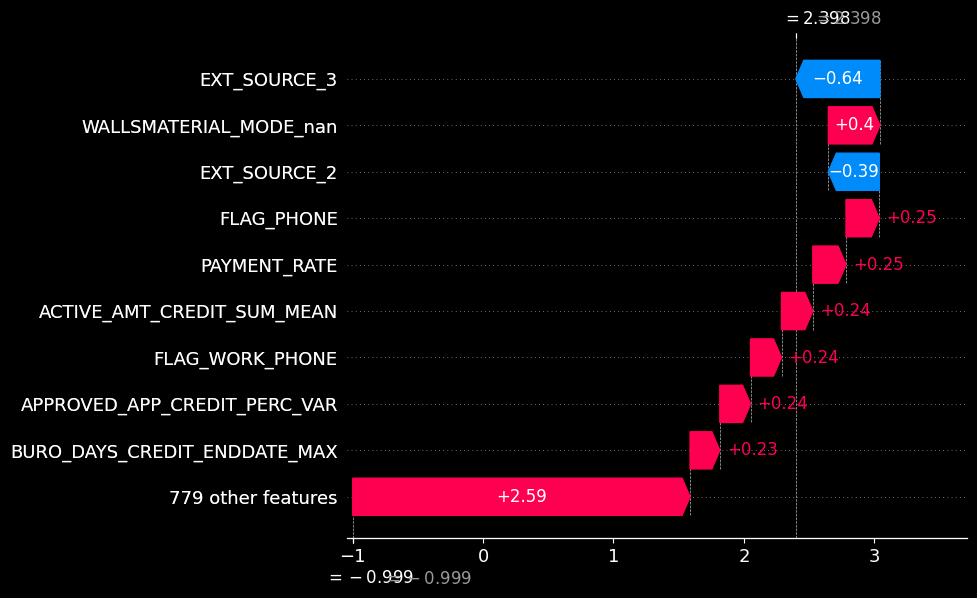

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[0],
    shap_values[0][0], 
    feature_names=X.columns
)

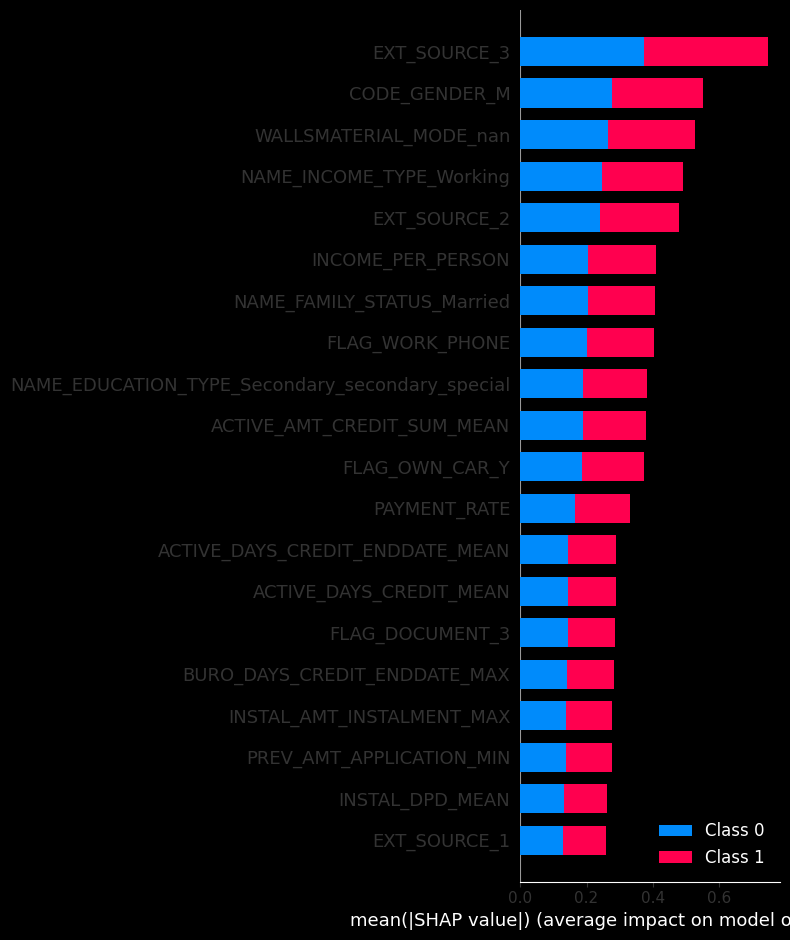

In [ ]:
shap.summary_plot(shap_values, features=X)

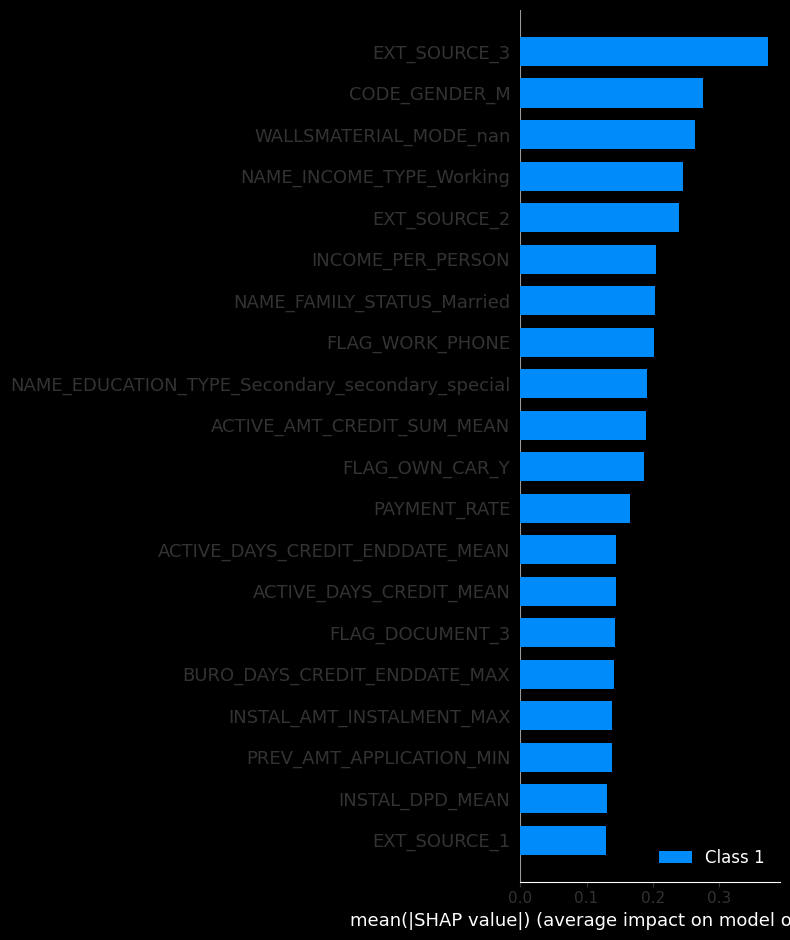

In [ ]:
shap.summary_plot(shap_values, features=X, class_inds=[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


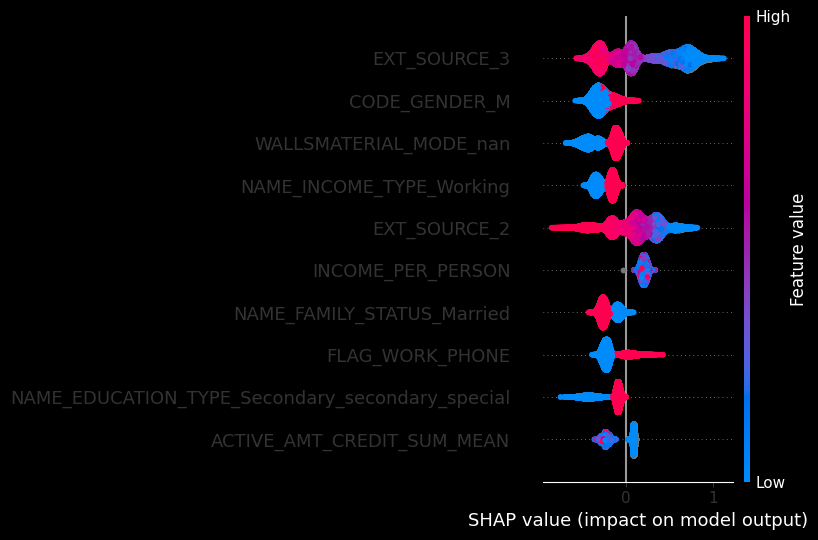

In [ ]:
shap.summary_plot(shap_values[1], features=X, max_display=10)

In [ ]:
explainer = shap.Explainer(clf, X[y > -1].to_numpy())  # X_train
shap_values = explainer(X[y > -1].to_numpy(), check_additivity=False)  # X_train
shap.plots.bar(shap_values)